## Step 3 - Climate Analysis and Exploration
Vacation range: Star Date 7/13/2018 and End Date 7/27/2018

In [61]:
# Importing Dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, inspect
from sqlalchemy.orm import Session
from sqlalchemy import func
import datetime as dt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# Creating db connection

engine = create_engine(f"sqlite:///hawaii.sqlite.db", echo=False)

In [63]:
inspector = inspect(engine)
inspector.get_table_names()

['hawaii_measurement', 'measurement', 'station']

In [64]:
# Declering base class
Base = automap_base()
# Using the Base class to reflect the database tables
Base.prepare(engine, reflect=True)
# Printing all of the classes mapped to the Base
Base.classes.keys()

['hawaii_measurement', 'measurement', 'station']

In [65]:
# Saving a reference to the "measurement"/"station" table as "Measurement"/"Station"
Measurement = Base.classes.measurement
Station = Base.classes.station

In [66]:
# Creating a session object
session = Session(engine)

## - Precipitation Analysis

In [67]:
# Connecting to database
conn= engine.connect()
#conn.execute("select date,prcp from measurement WHERE date >'2016-08-22'").fetchall()

In [68]:
# Loading the query results into a Pandas DataFrame and setting the index to the date column
mydf = pd.read_sql_query("SELECT date,prcp FROM measurement WHERE strftime('%Y-%m-%d', date)between '2016-08-22' and '2017-08-23' group by date order by date asc ",conn)
#mydf.set_index('date', inplace=True)

mydf.head()

,date,prcp
0,2016-08-22,1.2
1,2016-08-23,0.7
2,2016-08-24,1.45
3,2016-08-25,0.11
4,2016-08-26,0.01


In [37]:
#type(mydf['date'][0])

In [ ]:
mydf['date'] = pd.to_datetime(mydf['date'])

In [ ]:
mydf.index = mydf['date']
del mydf['date']
mydf.head()

In [ ]:
mydf.plot()
plt.show()

In [69]:
mydf.describe().transpose()

,count,unique,top,freq
date,367,367,2017-07-09,1
prcp,367,110,0.0,93


### Station Analysis

In [70]:
# Loading the query results into a Pandas DataFrame
df2 = pd.read_sql_query("SELECT * FROM station ",conn)

df2.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [71]:
# Calculating the total number of stations
df3 = pd.read_sql_query("SELECT count(distinct(station)) as 'Total Stations'  FROM station  ",conn)
df3.set_index('Total Stations', inplace=True)
df3.head()

""
Total Stations
9


In [72]:
# The most active station.
df4 = pd.read_sql_query("SELECT station,sum(tobs) as 'tobs' FROM measurement GROUP BY station ORDER BY tobs DESC ",conn)

df4

,station,tobs
0,USC00519397,600615
1,USC00519281,595956
2,USC00513117,587820
3,USC00519523,575094
4,USC00516128,528087
5,USC00514830,434739
6,USC00511918,414573
7,USC00517948,152829
8,USC00518838,74565


- USCOO519397 station has the highest number of observations.

In [73]:
# Retrieving the last 12 months of temperature observation data (tobs)
df5 = pd.read_sql_query("SELECT station,tobs FROM measurement WHERE date >'2016-8-22' order by tobs desc", conn)
#df.set_index('date', inplace=True)

df5.head()

,station,tobs
0,USC00519397,87
1,USC00519397,87
2,USC00519397,87
3,USC00519523,84
4,USC00519523,84


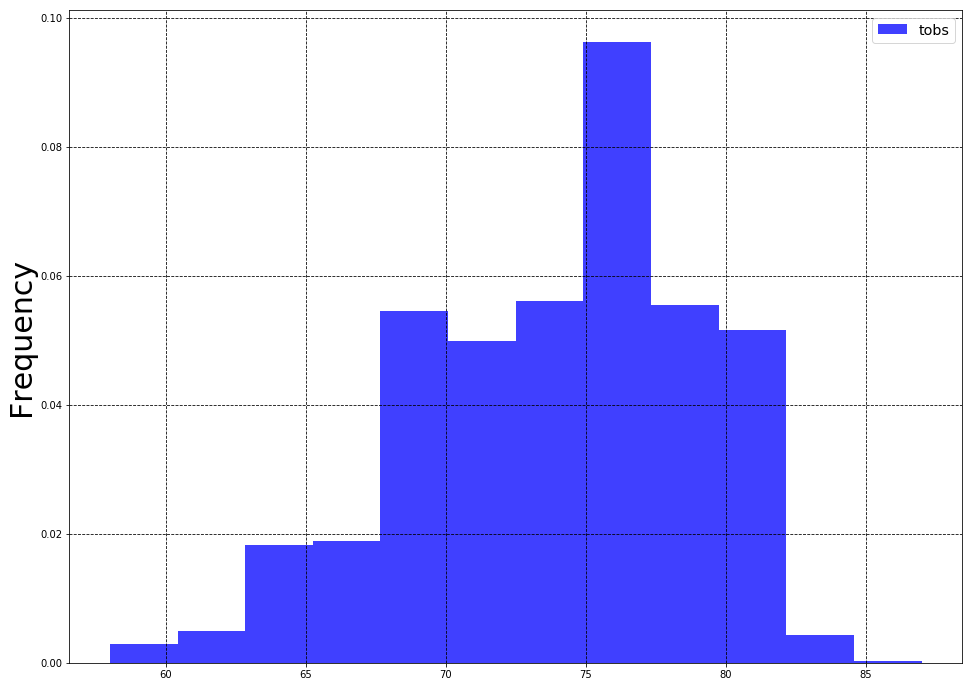

In [29]:
# Plotting as a histogram

df5.plot.hist(bins=12,normed=1, facecolor='blue', alpha=0.75, figsize=(16,12),)
plt.grid(True, color="black", linestyle= '--')
plt.ylabel("Frequency",fontsize=30)
plt.legend(loc="best",fontsize='x-large')
plt.show()

### Temperature Analysis

In [80]:
#Writing a function called 'calc_temps'
calc_temps = pd.read_sql_query("SELECT date,AVG(prcp),MAX(prcp), MIN(prcp) FROM measurement WHERE strftime('%Y-%m-%d', date)between '2016-07-13' and '2017-07-13' group by date order by date asc ",conn)
calc_temps.head()

,date,AVG(prcp),MAX(prcp),MIN(prcp)
0,2016-07-13,0.064000,0.14,0.0
1,2016-07-14,0.552000,1.15,0.0
2,2016-07-15,0.563333,1.7,0.14
3,2016-07-16,0.715000,2.05,0.03
4,2016-07-17,0.146000,0.55,0.0


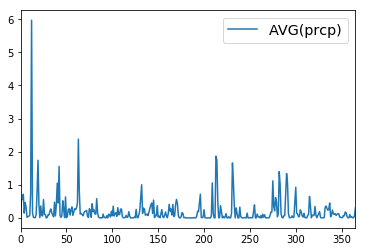

In [95]:
calc_temps.plot()
plt.legend(loc="best",fontsize='x-large')
plt.show()